In [1]:
!pip install fcapy
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [2]:
import pandas as pd
import numpy as np
#import neural_lib55 as nl

/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/ipykernel_1707/3275456309.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [4]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data_filled = pd.read_csv('Bank_Marketing.csv')
data_filled

,id,default,housing,loan,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,pdays_731-854,balance<=0,0 < balance < 10000,balance > 10000,day < 15,day >= 15,campaign<=5,campaign>5,previous<=5,previous>5
0,h0,False,True,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1,h1,False,False,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
2,h2,False,True,False,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
3,h3,False,True,False,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
4,h4,False,False,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,h11157,False,True,False,False,False,True,False,False,False,...,False,False,True,False,False,True,True,False,True,False
11158,h11158,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
11159,h11159,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
11160,h11160,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False


In [8]:
data_filled.shape

(11162, 61)

In [10]:
data_filled['sample_id'] = np.arange(0, data_filled.shape[0], 1).astype(str)
data_filled['id'] = data_filled['sample_id'].apply(lambda x: 'h' + x)
data_filled.drop(columns=['sample_id'], inplace=True)
data_filled = data_filled.set_index('id')
data_filled

,default,housing,loan,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,pdays_731-854,balance<=0,0 < balance < 10000,balance > 10000,day < 15,day >= 15,campaign<=5,campaign>5,previous<=5,previous>5
id,,,,,,,,,,,,,,,,,,,,,
h0,False,True,False,True,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
h1,False,False,False,True,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
h2,False,True,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
h3,False,True,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
h4,False,False,False,True,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h11157,False,True,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
h11158,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
h11159,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False


In [11]:
y = data_filled['deposit']
data_filled.drop(['deposit'], axis=1, inplace=True)

# Beginning of options

# Experiments 09.05.24

## DATA SPLITTING

In [12]:
from sklearn.model_selection import train_test_split
X_train_, X_rem, y_train_, y_rem = train_test_split(data_filled,y, train_size=0.6, random_state = 0)
X_valid, X_test_, y_valid, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)

In [13]:
y.value_counts()

deposit
False    5873
True     5289
Name: count, dtype: int64

In [14]:
X_train_.shape

(6697, 59)

In [15]:
y_train_.value_counts()

deposit
False    3497
True     3200
Name: count, dtype: int64

In [16]:
X_valid.shape

(2232, 59)

In [17]:
y_valid.value_counts()

deposit
False    1170
True     1062
Name: count, dtype: int64

In [18]:
X_test_.shape

(2233, 59)

In [19]:
y_test_.value_counts()

deposit
False    1206
True     1027
Name: count, dtype: int64

### FCA PART

In [20]:
K_train_ = FormalContext.from_pandas(X_train_)
K_train_

FormalContext (6697 objects, 59 attributes, 84493 connections)
      |default|housing|loan|job_admin.|job_blue-collar|...|day >= 15|campaign<=5|campaign>5|previous<=5|previous>5|
h5255 |       |       |    |         X|               |...|        X|          X|          |          X|          |
h6820 |       |       |    |         X|               |...|        X|           |         X|          X|          |
h2615 |       |       |    |         X|               |...|        X|          X|          |           |         X|
h9117 |       |       |    |          |              X|...|         |          X|          |          X|          |
h3262 |       |      X|   X|          |               |...|        X|          X|          |          X|          |
h9818 |       |      X|    |          |               |...|        X|          X|          |          X|          |
h1138 |       |      X|    |          |               |...|         |          X|          |          X|          |
h5218 |  

In [21]:
L_ = ConceptLattice.from_context(K_train_, algo='Sofia', is_monotone= True)
len(L_)

102

In [22]:
for c in L_:
    print(c.intent)

()
('pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
('pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5')
('pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
('pdays_366-730', 'pdays_731-854', 'balance<=0', 'balance > 10000', 'previous>5')
('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5')
('age_18-25', 'age_65+', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
('month_mar', 'month_oct', 'month_sep', 'poutcome_other', 'age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
('age_18-25', 'age_65+', 'pdays_1-182', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
('pdays_366-730', 'pdays_731-854', 'balance<=0', 'balance > 10000', 'campaign>5', 'previous>5')
('poutcome_failure', 

## Experiment with all concepts

In [23]:
L_ind = []
for c in L_:
    L_ind.append(L_.index(c))
#L_ind = L_ind[:3]
print(L_ind)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]


In [24]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
epochs_list = []
cn = nl.ConceptNetwork.from_lattice(L_, L_ind, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(50):
    k = 100
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred = pred_all[1]
    pred_train = pred_train_all[1]

    print('score train:', f1_score(y_train_, pred_train))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
print(max(f1_list))

Epoch  100


/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/sparselinear/sparselinear.py:109: SyntaxWarning: invalid escape sequence '\_'
  """Applies a linear transformation to the incoming data: :math:`y = xA^T + b`


KeyboardInterrupt: 

([<matplotlib.axis.YTick at 0x29a19bf50>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95')])

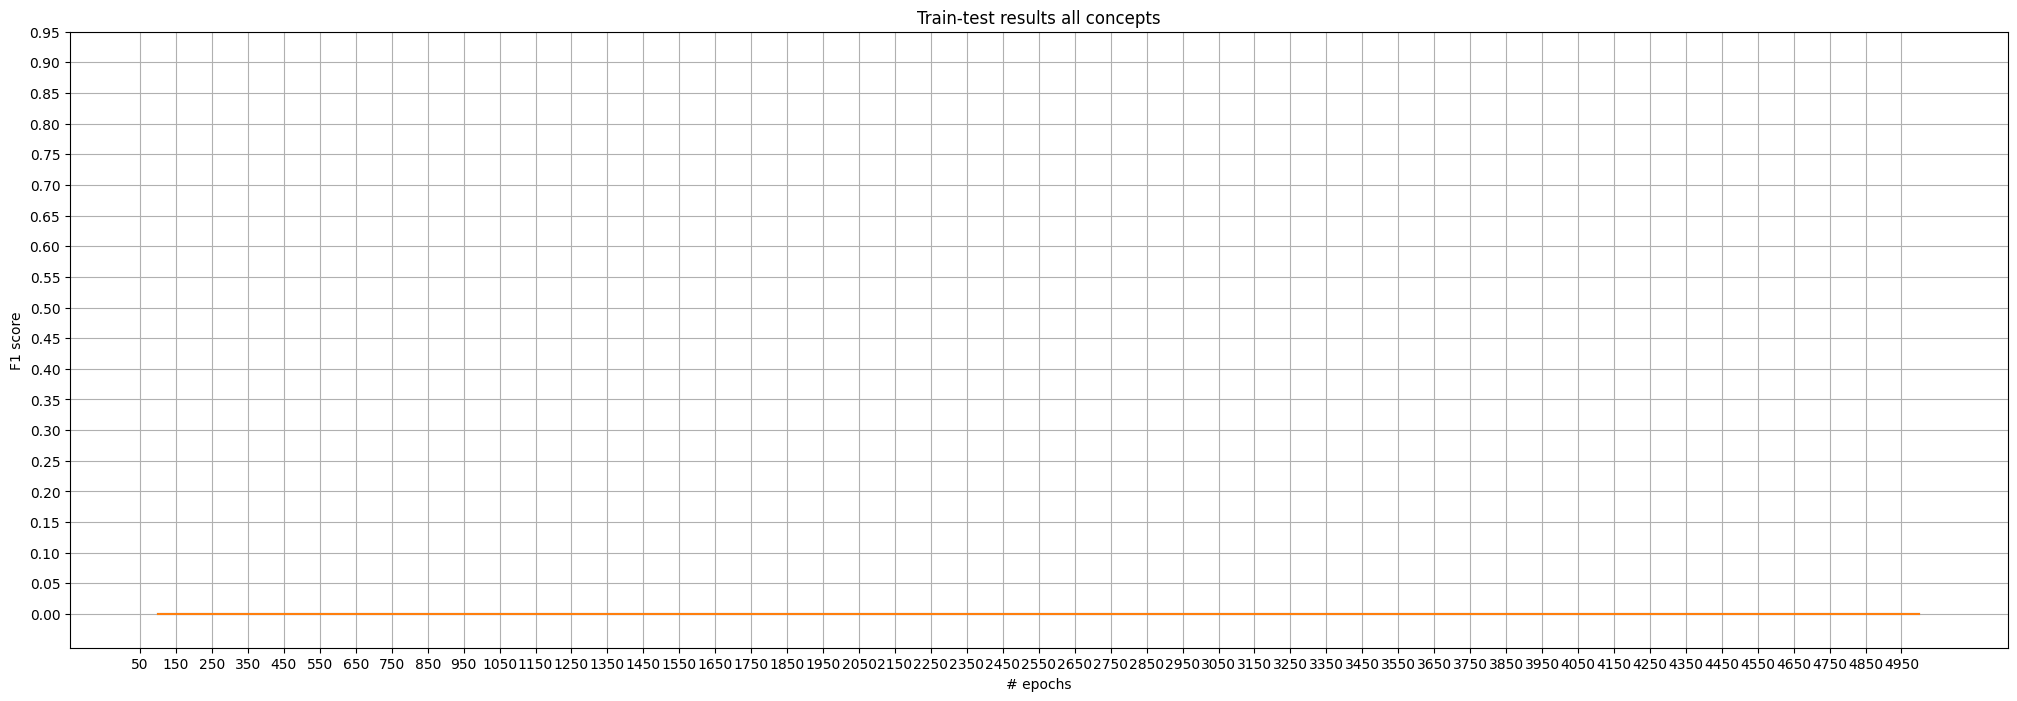

In [29]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)

plt.title('Train-test results all concepts')
plt.xlabel("# epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 5050, 100))
plt.yticks(np.arange(0, 1, 0.05))

In [30]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

In [31]:
edge_weights = cn.edge_weights_from_network()

/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/sparselinear/sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:620.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


Please, modify the ``pos`` dictionary parameter manually. You can obtain the default ``pos`` via Mover.initialize_pos(...) function.

The problematic edges and nodes (in the form of {edge: overlapped nodes indexes}) are:
{(59, 290): frozenset({459}), (59, 164): frozenset({421}), (59, 308): frozenset({462}), (59, 184): frozenset({426}), (59, 328): frozenset({465}), (59, 202): frozenset({434}), (59, 460): frozenset({507}), (59, 466): frozenset({508}), (59, 349): frozenset({468}), (59, 369): frozenset({471})}


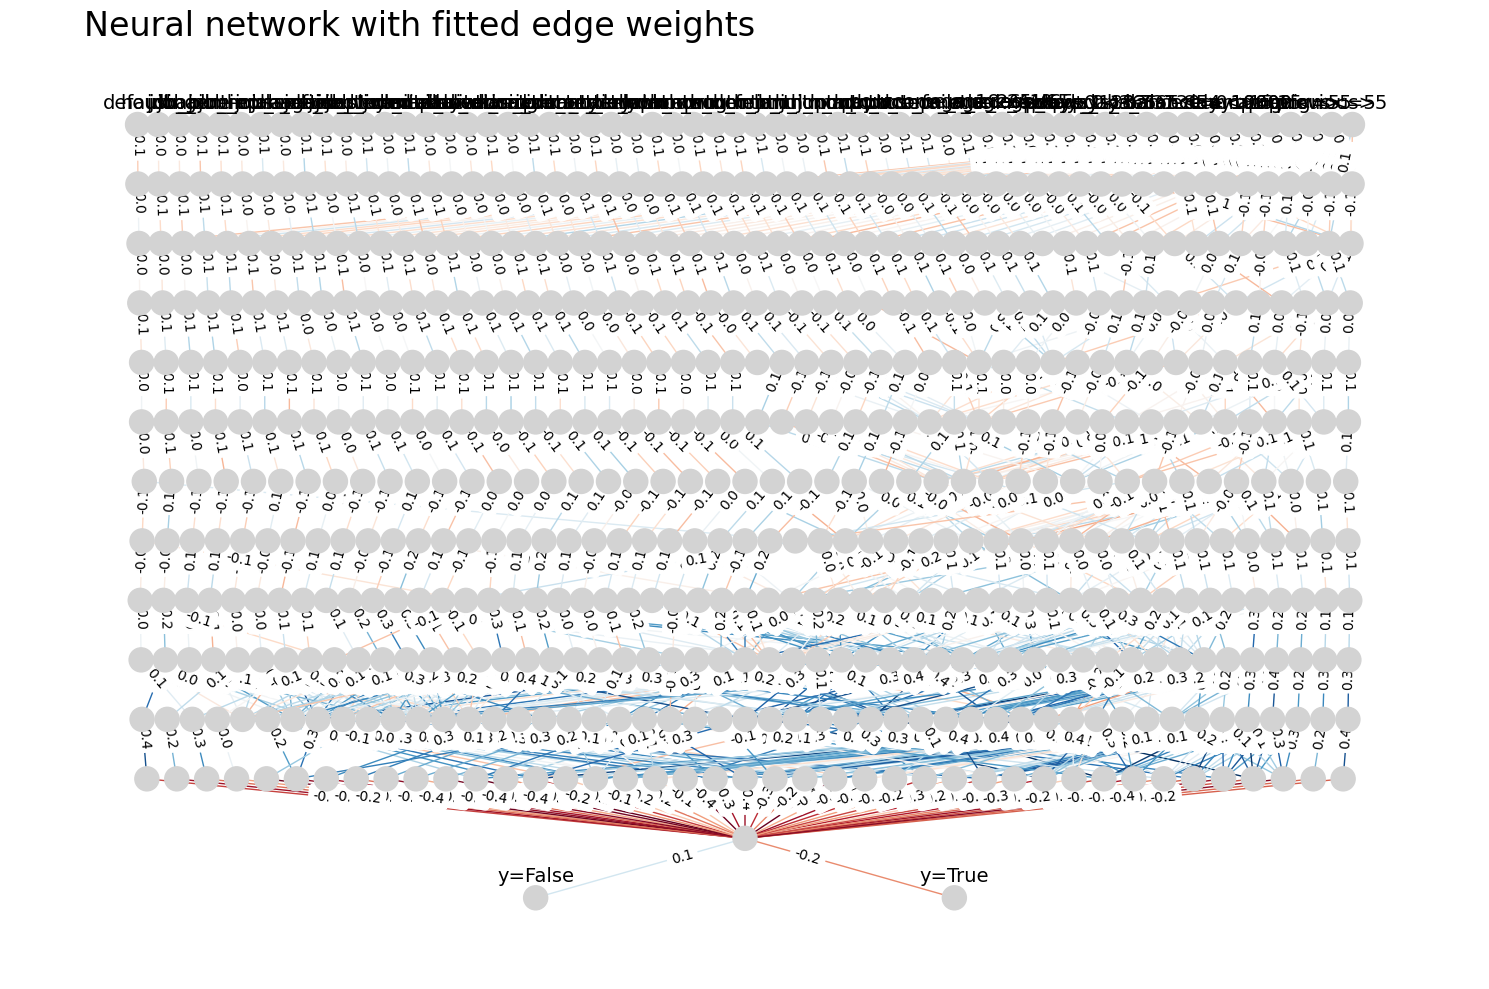

In [32]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,10))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network.png')
plt.show()

## End of experiments with all concepts

### Purity function

In [24]:
def purity(concept, y_train):
    count_pos = 0
    count_neg = 0
    positive = True
    for obj in concept.extent:
        if y_train[obj] == True:
            count_pos+= 1
        else:
            count_neg+= 1
            
    if count_pos < count_neg:
        positive = False
    if len(concept.extent)!= 0:
        return count_pos, count_neg, max(count_pos, count_neg)/ len(concept.extent), positive
    else:
        return 0,0, 0, False

### Object coverage function

In [25]:
def obj_coverage(concept, y_train):
    return round(len(concept.extent)/len(y_train),2)

### Concept properties calculation

In [26]:
L_prop = []
conc_prop = []
pos = 0 
neg = 0
pur  = 0
pur_list = []
cover = 0
for c in L_:
    conc_prop.append(c) # 0-s element is concepts itself
    pos, neg, pur, positive = purity(c, y_train_)
    pur_list.append(pos)
    pur_list.append(neg)
    pur_list.append(pur)
    pur_list.append(positive)
    cover = obj_coverage(c, y_train_)
    conc_prop.append(pur_list) #  1-s element is purity itself
    conc_prop.append(cover)  #  2-s element is coverage itself
    L_prop.append(conc_prop)
    conc_prop = []
    pur_list = []
    pur = 0
    cover = 0 

In [27]:
pur_list = []
cover_list = []
for c in L_prop:
    pur_list.append(c[1][2]) # just purities
    cover_list.append(c[2])  #just object coverages

In [28]:
print('min-max purity:', min(pur_list), max(pur_list)) # this particular train-test-valid
print('min-max coverage:', min(cover_list), max(cover_list)) # (object coverage)

min-max purity: 0 0.7313527180783818
min-max coverage: 0.0 1.0


In [29]:
for c in L_prop:
    print(round(c[1][2],2),round(c[2],2)) # for each concept print its purity and object coverage

0 0.0
0.7 0.08
0.71 0.15
0.51 0.15
0.64 0.16
0.53 0.2
0.57 0.22
0.66 0.23
0.73 0.24
0.73 0.24
0.57 0.26
0.69 0.27
0.57 0.3
0.62 0.31
0.62 0.31
0.51 0.33
0.6 0.34
0.5 0.39
0.55 0.4
0.54 0.41
0.53 0.43
0.66 0.45
0.64 0.46
0.61 0.52
0.59 0.52
0.57 0.55
0.57 0.55
0.58 0.59
0.56 0.59
0.54 0.6
0.57 0.6
0.53 0.62
0.54 0.63
0.55 0.66
0.54 0.67
0.5 0.68
0.51 0.68
0.52 0.69
0.52 0.69
0.5 0.7
0.51 0.7
0.53 0.71
0.52 0.71
0.51 0.72
0.53 0.73
0.53 0.73
0.52 0.73
0.53 0.74
0.51 0.76
0.5 0.78
0.51 0.79
0.51 0.8
0.5 0.8
0.51 0.81
0.5 0.81
0.52 0.81
0.5 0.82
0.5 0.83
0.5 0.83
0.5 0.84
0.5 0.85
0.51 0.85
0.5 0.85
0.56 0.85
0.51 0.85
0.5 0.85
0.51 0.86
0.5 0.86
0.5 0.86
0.52 0.86
0.52 0.87
0.51 0.87
0.51 0.87
0.5 0.88
0.51 0.88
0.52 0.89
0.51 0.9
0.51 0.91
0.51 0.92
0.52 0.92
0.51 0.92
0.51 0.92
0.51 0.92
0.51 0.92
0.51 0.92
0.54 0.92
0.51 0.92
0.51 0.92
0.5 0.92
0.52 0.93
0.54 0.93
0.52 0.93
0.51 0.93
0.52 0.93
0.52 0.93
0.51 0.93
0.51 0.93
0.51 0.94
0.5 0.94
0.51 0.94
0.52 0.94
0.52 1.0


In [30]:
count_pur_one_sided = {} # dictionary of number of concepts in  the purity interval [key,) (from this value and above)
pur_conc_one_sided = {} # dictionary of concept lists in  the purity interval [key, )
pur_conc_all_one_sided ={} # dictionary of all concepts (with all properties) belonging to particular intervals
cov_conc_one_sided = {} # dictionart of all concepts' coverages belonging to particular intervals

for i in np.arange(0, 1, 0.05):
    count_pur_one_sided[round(i,2)] = 0
    pur_conc_one_sided[round(i,2)] = []
    pur_conc_all_one_sided[round(i,2)] = []
    cov_conc_one_sided[round(i,2)] = []
    
   # print(round(i,2))
    for c in L_prop:
        if (c[1][2]>= round(i,2)): # purity above this threshold 
            count_pur_one_sided[round(i,2)]+=1 # how many in this interval
            pur_conc_one_sided[round(i,2)].append(c[0]) # what concepts are in this interval
            pur_conc_all_one_sided[round(i,2)].append(c) # add everything connected to this concepts
            cov_conc_one_sided[round(i,2)].append(c[2]) # add object coverage connected to this concepts
            
# print(count_pur)
# check_1 = 0
# check_2 = 0
# for key in count_pur:
#     check_1+=count_pur[key]
#     check_2+=len(pur_conc[key])
# print(check_1, check_2)

In [31]:
print(count_pur_one_sided)

{0.0: 102, 0.05: 101, 0.1: 101, 0.15: 101, 0.2: 101, 0.25: 101, 0.3: 101, 0.35: 101, 0.4: 101, 0.45: 101, 0.5: 101, 0.55: 23, 0.6: 12, 0.65: 7, 0.7: 4, 0.75: 0, 0.8: 0, 0.85: 0, 0.9: 0, 0.95: 0}


In [32]:
for key in pur_conc_all_one_sided:
    print(key, count_pur_one_sided[key]) # number of concept with purity above this 
    if count_pur_one_sided[key] == 0:
        print('0')
    else:
        print(max(cov_conc_one_sided[key]))

0.0 102
1.0
0.05 101
1.0
0.1 101
1.0
0.15 101
1.0
0.2 101
1.0
0.25 101
1.0
0.3 101
1.0
0.35 101
1.0
0.4 101
1.0
0.45 101
1.0
0.5 101
1.0
0.55 23
0.85
0.6 12
0.52
0.65 7
0.45
0.7 4
0.24
0.75 0
0
0.8 0
0
0.85 0
0
0.9 0
0
0.95 0
0


In [33]:
for c in pur_conc_one_sided[0.7]:
    print(L_.index(c))

1
2
8
9


# Concept analysis

In [34]:
pur_07 = 0.7
table_bm_07 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.7')
i = 0
for conc in pur_conc_all_one_sided[pur_07]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    print(conc[2])
    print(conc[1][3])
    print(conc[0].intent)


    table_bm_07.loc[i] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_bm_07.to_csv('table_bm_07.csv')
table_bm_07

purity >= 0.7
positive objects 363
negative objects 153
purity 0.7
0.08
True
('pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 710
negative objects 285
purity 0.71
0.15
True
('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1157
negative objects 425
purity 0.73
0.24
True
('month_mar', 'month_oct', 'month_sep', 'poutcome_other', 'age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1169
negative objects 443
purity 0.73
0.24
True
('age_18-25', 'age_65+', 'pdays_1-182', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')


,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(pdays_366-730, pdays_731-854, balance > 10000...",0.70,0.08,363,153,True
1,"(age_18-25, age_65+, pdays_366-730, pdays_731-...",0.71,0.15,710,285,True
2,"(month_mar, month_oct, month_sep, poutcome_oth...",0.73,0.24,1157,425,True
3,"(age_18-25, age_65+, pdays_1-182, pdays_366-73...",0.73,0.24,1169,443,True


In [36]:
pur_065 = 0.65
table_bm_065 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.65')
i = 0
for conc in pur_conc_all_one_sided[pur_065]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    print(conc[2])
    print(conc[1][3])
    print(conc[0].intent)


    table_bm_065.loc[i] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_bm_065.to_csv('table_bm_065.csv')
table_bm_065

purity >= 0.65
positive objects 363
negative objects 153
purity 0.7
0.08
True
('pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 710
negative objects 285
purity 0.71
0.15
True
('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1003
negative objects 513
purity 0.66
0.23
True
('age_18-25', 'age_65+', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1157
negative objects 425
purity 0.73
0.24
True
('month_mar', 'month_oct', 'month_sep', 'poutcome_other', 'age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1169
negative objects 443
purity 0.73
0.24
True
('age_18-25', 'age_65+', 'pdays_1-182', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1231
negative objects 563
purity 0.69
0.27
True
('poutcome_failure', 'poutcome_other', 'poutcome_success', 'pdays_1-182',

,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(pdays_366-730, pdays_731-854, balance > 10000...",0.70,0.08,363,153,True
1,"(age_18-25, age_65+, pdays_366-730, pdays_731-...",0.71,0.15,710,285,True
2,"(age_18-25, age_65+, pdays_183-365, pdays_366-...",0.66,0.23,1003,513,True
3,"(month_mar, month_oct, month_sep, poutcome_oth...",0.73,0.24,1157,425,True
4,"(age_18-25, age_65+, pdays_1-182, pdays_366-73...",0.73,0.24,1169,443,True
5,"(poutcome_failure, poutcome_other, poutcome_su...",0.69,0.27,1231,563,True
6,"(month_apr, month_dec, month_feb, month_jan, m...",0.66,0.45,2005,1017,True


In [35]:
pur_06 = 0.6
table_bm_06 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.6')
i = 0
for conc in pur_conc_all_one_sided[pur_06]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    print(conc[2])
    print(conc[1][3])
    print(conc[0].intent)


    table_bm_06.loc[i] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_bm_06.to_csv('table_bm_06.csv')
table_bm_06

purity >= 0.6
positive objects 363
negative objects 153
purity 0.7
0.08
True
('pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 710
negative objects 285
purity 0.71
0.15
True
('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 697
negative objects 397
purity 0.64
0.16
True
('pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1003
negative objects 513
purity 0.66
0.23
True
('age_18-25', 'age_65+', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1157
negative objects 425
purity 0.73
0.24
True
('month_mar', 'month_oct', 'month_sep', 'poutcome_other', 'age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1169
negative objects 443
purity 0.73
0.24
True
('age_18-25', 'age_65+', 'pdays_1-182', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'pre

,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(pdays_366-730, pdays_731-854, balance > 10000...",0.70,0.08,363,153,True
1,"(age_18-25, age_65+, pdays_366-730, pdays_731-...",0.71,0.15,710,285,True
2,"(pdays_183-365, pdays_366-730, pdays_731-854, ...",0.64,0.16,697,397,True
3,"(age_18-25, age_65+, pdays_183-365, pdays_366-...",0.66,0.23,1003,513,True
4,"(month_mar, month_oct, month_sep, poutcome_oth...",0.73,0.24,1157,425,True
5,"(age_18-25, age_65+, pdays_1-182, pdays_366-73...",0.73,0.24,1169,443,True
6,"(poutcome_failure, poutcome_other, poutcome_su...",0.69,0.27,1231,563,True
7,"(month_mar, month_oct, month_sep, poutcome_oth...",0.62,0.31,1278,772,True
8,"(age_18-25, age_65+, pdays_1-182, pdays_366-73...",0.62,0.31,1293,795,True
9,"(month_apr, month_dec, month_feb, month_jan, m...",0.66,0.45,2005,1017,True


In [37]:
pur_055 = 0.55
table_bm_055 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.55')
i = 0
for conc in pur_conc_all_one_sided[pur_055]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    print(conc[2])
    print(conc[1][3])
    print(conc[0].intent)


    table_bm_055.loc[i] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_bm_055.to_csv('table_mm_055.csv')
table_bm_055

purity >= 0.55
positive objects 363
negative objects 153
purity 0.7
0.08
True
('pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 710
negative objects 285
purity 0.71
0.15
True
('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 697
negative objects 397
purity 0.64
0.16
True
('pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 838
negative objects 642
purity 0.57
0.22
True
('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5')
positive objects 1003
negative objects 513
purity 0.66
0.23
True
('age_18-25', 'age_65+', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1157
negative objects 425
purity 0.73
0.24
True
('month_mar', 'month_oct', 'month_sep', 'poutcome_other', 'age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'prev

,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(pdays_366-730, pdays_731-854, balance > 10000...",0.70,0.08,363,153,True
1,"(age_18-25, age_65+, pdays_366-730, pdays_731-...",0.71,0.15,710,285,True
2,"(pdays_183-365, pdays_366-730, pdays_731-854, ...",0.64,0.16,697,397,True
3,"(age_18-25, age_65+, pdays_366-730, pdays_731-...",0.57,0.22,838,642,True
4,"(age_18-25, age_65+, pdays_183-365, pdays_366-...",0.66,0.23,1003,513,True
5,"(month_mar, month_oct, month_sep, poutcome_oth...",0.73,0.24,1157,425,True
6,"(age_18-25, age_65+, pdays_1-182, pdays_366-73...",0.73,0.24,1169,443,True
7,"(pdays_366-730, pdays_731-854, balance<=0, bal...",0.57,0.26,752,1002,False
8,"(poutcome_failure, poutcome_other, poutcome_su...",0.69,0.27,1231,563,True
9,"(age_18-25, age_65+, pdays_183-365, pdays_366-...",0.57,0.30,1120,862,True


In [38]:
pur_065 = 0.65
print('purity >= 0.65 and < 0.7')
table_bm_065_07 = pd.DataFrame(columns = ['pos','neg','pur', 'cov', 'pos?', 'intent'])
for conc in pur_conc_all_one_sided[pur_065]:
    if conc[1][2]< 0.7:
        table_bm_065_07.loc[len(table_bm_065_07)] = [conc[1][0], conc[1][1], round(conc[1][2],2), conc[2], conc[1][3], conc[0].intent]
        print('positive objects', conc[1][0])
        print('negative objects', conc[1][1])
        print('purity', conc[1][2])
        print(conc[2])
        print(conc[1][3])
        print(conc[0].intent)
table_bm_065_07.to_csv('table_bm_065_07.csv')
table_bm_065_07

purity >= 0.65 and < 0.7
positive objects 1003
negative objects 513
purity 0.6616094986807388
0.23
True
('age_18-25', 'age_65+', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1231
negative objects 563
purity 0.6861761426978819
0.27
True
('poutcome_failure', 'poutcome_other', 'poutcome_success', 'pdays_1-182', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 2005
negative objects 1017
purity 0.6634679020516214
0.45
True
('month_apr', 'month_dec', 'month_feb', 'month_jan', 'month_mar', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'age_18-25', 'age_65+', 'pdays_1-182', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')


,pos,neg,pur,cov,pos?,intent
0,1003,513,0.66,0.23,True,"(age_18-25, age_65+, pdays_183-365, pdays_366-..."
1,1231,563,0.69,0.27,True,"(poutcome_failure, poutcome_other, poutcome_su..."
2,2005,1017,0.66,0.45,True,"(month_apr, month_dec, month_feb, month_jan, m..."


In [39]:
pur_06 = 0.6
print('purity >= 0.6 and < 0.65')
table_bm_06_065 = pd.DataFrame(columns = ['pos','neg','pur', 'cov', 'pos?', 'intent'])
for conc in pur_conc_all_one_sided[pur_06]:
    if conc[1][2]< 0.65:
        table_bm_06_065.loc[len(table_bm_06_065)] = [conc[1][0], conc[1][1], round(conc[1][2],2), conc[2], conc[1][3], conc[0].intent]
        print('positive objects', conc[1][0])
        print('negative objects', conc[1][1])
        print('purity', conc[1][2])
        print(conc[2])
        print(conc[1][3])
        print(conc[0].intent)
table_bm_06_065.to_csv('table_bm_06_065.csv')
table_bm_06_065

purity >= 0.6 and < 0.65
positive objects 697
negative objects 397
purity 0.6371115173674589
0.16
True
('pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 1278
negative objects 772
purity 0.6234146341463415
0.31
True
('month_mar', 'month_oct', 'month_sep', 'poutcome_other', 'age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5')
positive objects 1293
negative objects 795
purity 0.6192528735632183
0.31
True
('age_18-25', 'age_65+', 'pdays_1-182', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5')
positive objects 1943
negative objects 1113
purity 0.6357984293193717
0.46
True
('month_dec', 'month_feb', 'month_jan', 'month_mar', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'age_18-25', 'age_65+', 'pdays_1-182', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
positive objects 

,pos,neg,pur,cov,pos?,intent
0,697,397,0.64,0.16,True,"(pdays_183-365, pdays_366-730, pdays_731-854, ..."
1,1278,772,0.62,0.31,True,"(month_mar, month_oct, month_sep, poutcome_oth..."
2,1293,795,0.62,0.31,True,"(age_18-25, age_65+, pdays_1-182, pdays_366-73..."
3,1943,1113,0.64,0.46,True,"(month_dec, month_feb, month_jan, month_mar, m..."
4,2105,1348,0.61,0.52,True,"(month_apr, month_dec, month_feb, month_jan, m..."


In [40]:
pur_055 = 0.55
print('purity >= 0.55 and < 0.6')
table_bm_055_06 = pd.DataFrame(columns = ['pos','neg','pur', 'cov', 'pos?', 'intent'])
for conc in pur_conc_all_one_sided[pur_055]:
    if conc[1][2]< 0.6:
        table_bm_055_06.loc[len(table_bm_055_06)] = [conc[1][0], conc[1][1], round(conc[1][2],2), conc[2], conc[1][3], conc[0].intent]
        print('positive objects', conc[1][0])
        print('negative objects', conc[1][1])
        print('purity', conc[1][2])
        print(conc[2])
        print(conc[1][3])
        print(conc[0].intent)
table_bm_055_06.to_csv('table_bm_055_06.csv')
table_bm_055_06

purity >= 0.55 and < 0.6
positive objects 838
negative objects 642
purity 0.5662162162162162
0.22
True
('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5')
positive objects 752
negative objects 1002
purity 0.5712656784492588
0.26
False
('pdays_366-730', 'pdays_731-854', 'balance<=0', 'balance > 10000', 'campaign>5', 'previous>5')
positive objects 1120
negative objects 862
purity 0.5650857719475277
0.3
True
('age_18-25', 'age_65+', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5')
positive objects 1355
negative objects 913
purity 0.5974426807760141
0.34
True
('poutcome_failure', 'poutcome_other', 'poutcome_success', 'pdays_1-182', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5')
positive objects 2044
negative objects 1446
purity 0.5856733524355301
0.52
True
('month_dec', 'month_feb', 'month_jan', 'month_mar', 'month_nov', 'month_oct', 'mon

,pos,neg,pur,cov,pos?,intent
0,838,642,0.57,0.22,True,"(age_18-25, age_65+, pdays_366-730, pdays_731-..."
1,752,1002,0.57,0.26,False,"(pdays_366-730, pdays_731-854, balance<=0, bal..."
2,1120,862,0.57,0.30,True,"(age_18-25, age_65+, pdays_183-365, pdays_366-..."
3,1355,913,0.60,0.34,True,"(poutcome_failure, poutcome_other, poutcome_su..."
4,2044,1446,0.59,0.52,True,"(month_dec, month_feb, month_jan, month_mar, m..."
5,2082,1581,0.57,0.55,True,"(month_jun, month_mar, month_nov, month_oct, m..."
6,2123,1578,0.57,0.55,True,"(month_aug, month_dec, month_feb, month_jan, m..."
7,2301,1667,0.58,0.59,True,"(month_apr, month_dec, month_feb, month_jan, m..."
8,2238,1743,0.56,0.59,True,"(month_apr, month_dec, month_feb, month_jan, m..."
9,2298,1711,0.57,0.60,True,"(education_unknown, contact_telephone, month_a..."


## 2 concepts

### 1. Check for purity above 0.7

In [41]:
pur_07 = 0.7
L_ind_07 = []
for conc in pur_conc_all_one_sided[pur_07]:
    L_ind_07.append(L_.index(conc[0]))
print(L_ind_07)

[1, 2, 8, 9]


In [42]:
len(L_ind_07)

4

### 2. Check for purity above 0.65

In [43]:
pur_065 = 0.65
L_ind_065 = []
for conc in pur_conc_all_one_sided[pur_065]:
    L_ind_065.append(L_.index(conc[0]))
print(L_ind_065)

[1, 2, 7, 8, 9, 11, 21]


### 2: Check for purity above 0.6

In [44]:
pur_06 = 0.6
L_ind_06 = []
for conc in pur_conc_all_one_sided[pur_06]:
    #print(conc[0].intent)
    L_ind_06.append(L_.index(conc[0]))
print(L_ind_06)

[1, 2, 4, 7, 8, 9, 11, 13, 14, 21, 22, 23]


### 3. Let's try all concepts from the interval >0.7

In [46]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_07][0][0].extent))
for conc in pur_conc_all_one_sided[pur_07]:
    #print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))

0.3


In [64]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_bm_07_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_07, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_bm_07_all.loc[len(res_bm_07_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  850
score train: 0.0
score val: 0.0
score test: 0.

In [65]:
res_bm_07_all.to_csv('res_bm_07_all.csv')

([<matplotlib.axis.YTick at 0x2a1c733e0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

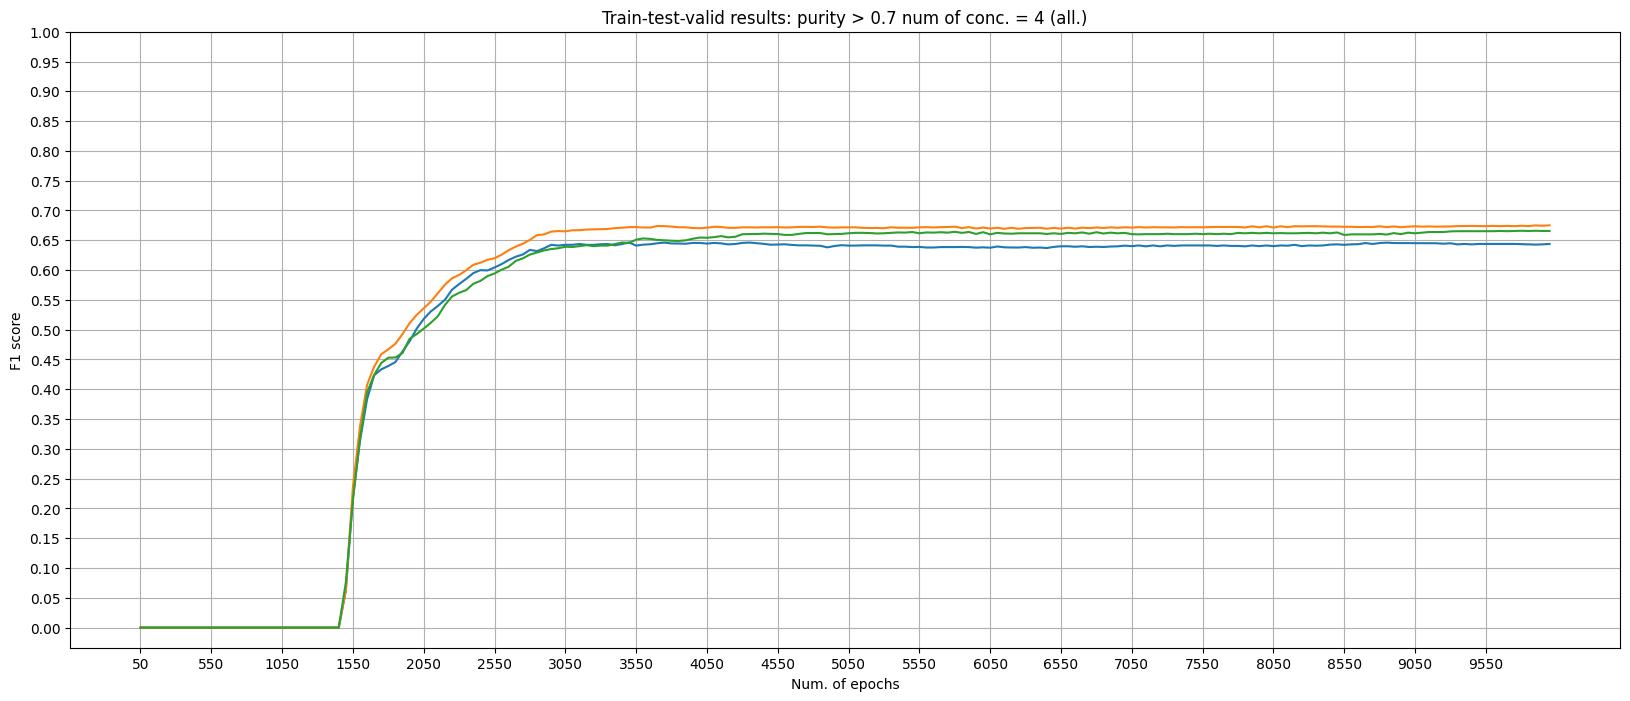

In [69]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.title('Train-test-valid results: purity > 0.7 num of conc. = 4 (all.)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 500))
plt.yticks(np.arange(0, 1.05, 0.05))

In [73]:
res_bm_07_all[res_bm_07_all['epoch']==3250]

,epoch,F1_score_train,F1_score_val,F1_score_test
64,3250.0,0.668333,0.64008,0.642343


### 2. Let's try all concepts from this interval: purity > 0.65

#### 1) They cover:

In [74]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_065][0][0].extent))
for conc in pur_conc_all_one_sided[pur_065]:
    print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))


0.08
0.15
0.23
0.24
0.24
0.27
0.45
0.45


#### Checking the performance:


In [76]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_bm_065_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_065, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_bm_065_all.loc[len(res_bm_065_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  850
score train: 0.0
score val: 0.0
score test: 0.

In [77]:
res_bm_065_all.to_csv('res_bm_065_all.csv')

([<matplotlib.axis.YTick at 0x2a21decf0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

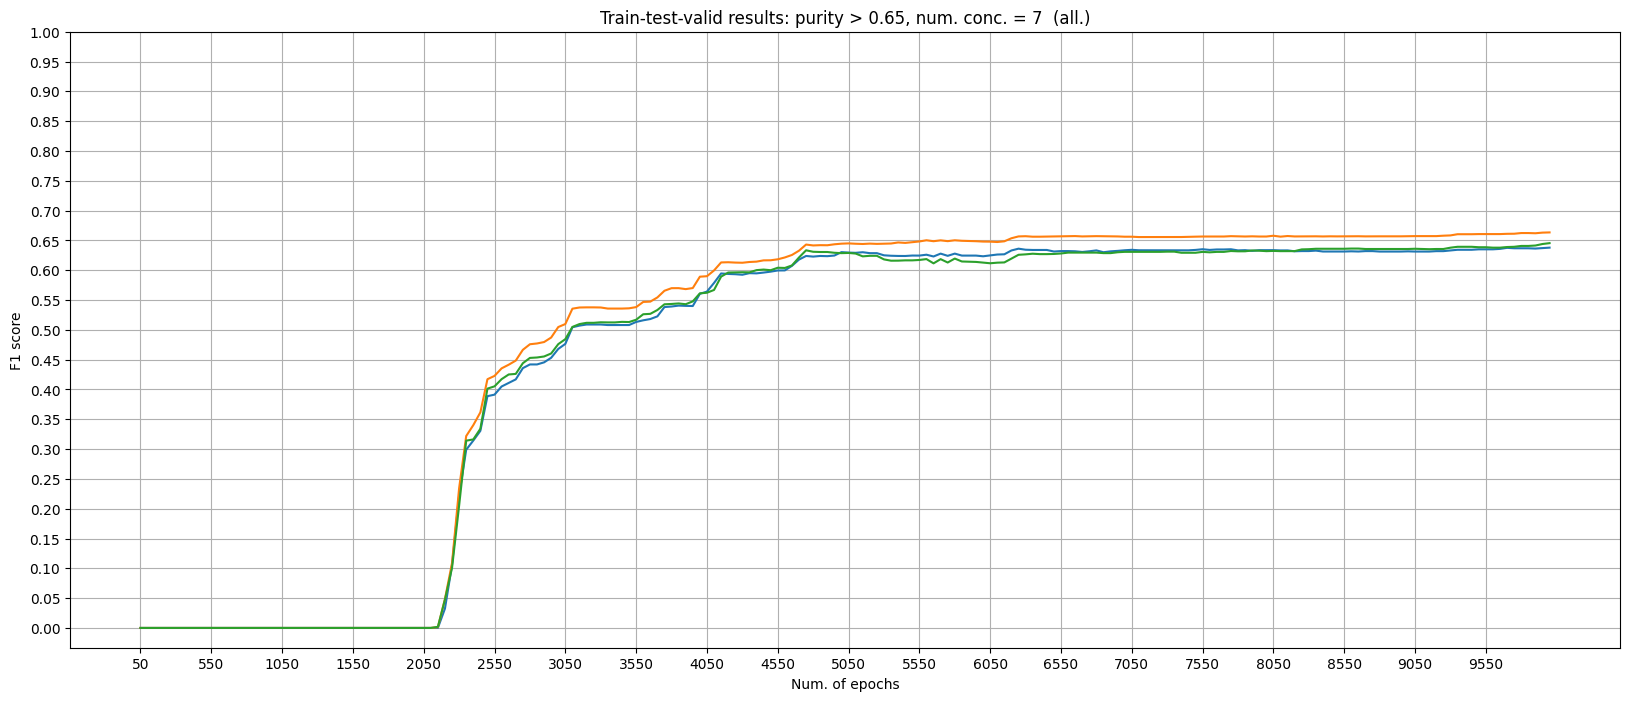

In [78]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)

plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 500))
plt.yticks(np.arange(0, 1.05, 0.05))

In [86]:
res_bm_065_all[res_bm_065_all['epoch']== 6250]

,epoch,F1_score_train,F1_score_val,F1_score_test
124,6250.0,0.656675,0.625865,0.636119


In [87]:
# vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')
# edge_weights = cn.edge_weights_from_network()

In [465]:
# descr = {'Synfuels', 'Physician', 'Duty-free', 'Missile', 'Nicaragua', 'Budget'}

# traced = cn.trace_description(descr, include_targets=False)

In [88]:
# import networkx as nx

# fig, ax = plt.subplots(figsize=(20,10))

# vis.draw_poset(
#     cn.poset, ax=ax, 
#     flg_node_indices=False,
#     node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
#     node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
#     edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
#     edge_cmap=plt.cm.RdBu,
# )
# nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

# plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
# plt.tight_layout()
# plt.subplots_adjust()
# #plt.savefig('fitted_network.png')
# plt.show()

### Let's try all concepts from this interval: (purity > 0.6)

#### 1) They cover:

In [107]:
union_coverage_obj = set()
for conc in pur_conc_all_one_sided[pur_06]:
    #print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))
    

0.57


#### Checking the performance:

In [146]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_bm_06_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_06, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(20):
    k = 500
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_bm_06_all.loc[len(res_bm_06_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  1000
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  1500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  2000
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  2500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  3000
score train: 0.3577545195052331
score val: 0.3419170243204578
score test: 0.3313782991202346
Epoch  3500
score train: 0.48721174004192874
score val: 0.4623179227359088
score test: 0.4557779212395094
Epoch  4000
score train: 0.5382492113564669
score val: 0.5170965806838632
score test: 0.5167173252279635
Epoch  4500
score train: 0.5773512476007677
score val: 0.5686046511627907
score test: 0.5545023696682464
Epoch  5000
score train: 0.5768110312682074
score val: 0.5645539906103286
score test: 0.5512282804074295
Epoch  5500
score train: 0.5768330733229329
score val: 0.5648584905660378
score test: 0.5500603136308806
Epoch  6000
score train: 0.6089406461307287
score val: 0.6009019165727

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

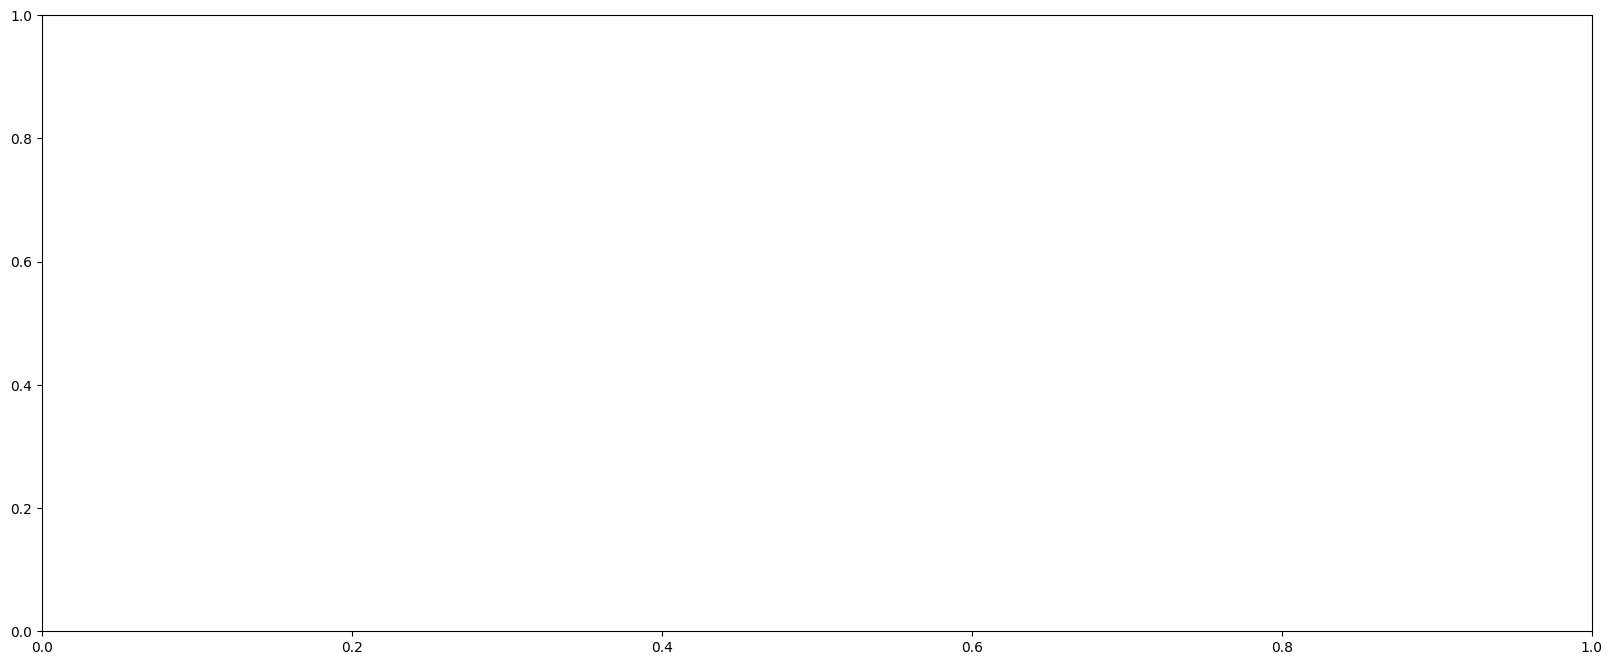

In [142]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.title('Train-test-valid results: purity > 0.6 num of conc. =  12 (all.)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 400))
plt.yticks(np.arange(0, 1.05, 0.05))

In [101]:
res_bm_06_all[res_bm_06_all['epoch']== 9500]

,epoch,F1_score_train,F1_score_val,F1_score_test
189,9500.0,0.607293,0.585746,0.578437


In [102]:
# for col in X_train_.columns:
#     print(X_train_[col].value_counts())

In [103]:
# vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')
# edge_weights = cn.edge_weights_from_network()

In [104]:
# descr = {'Physician', 'Duty-free', 'Missile', 'Nicaragua', 'Budget'}

# traced = cn.trace_description(descr, include_targets=False)

In [105]:
# import networkx as nx

# fig, ax = plt.subplots(figsize=(20,10))

# vis.draw_poset(
#     cn.poset, ax=ax, 
#     flg_node_indices=False,
#     node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
#     node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
#     edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
#     edge_cmap=plt.cm.RdBu,
# )
# nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

# plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
# plt.tight_layout()
# plt.subplots_adjust()
# #plt.savefig('fitted_network.png')
# plt.show()

### Choosing 2 concepts with maximal union coverage with purity above 0.7

#### Counting concept coverage one-by-one

In [82]:
n = 2
pur_07 = 0.7
sorted_cov = sorted(cov_conc_one_sided[pur_07])

t = count_pur_one_sided[pur_07]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_07]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_07]:
       # print('len(max_cov)', len(max_cov))
       # print('len(set(first_c[0].extent).union(set(conc[0].extent)))', len(set(first_c[0].extent).union(set(conc[0].extent))))
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
           # print
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
           # print('y', len(set(first_c[0].extent).union(set(conc[0].extent))))
            print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
           # print('l',len(max_cov))
            chosen = conc
            
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.3
0.3
0.24
0.24
0.15
0.24
0.24
{1: [0.3, [8, 9]], 2: [0.3, [8, 9]], 3: [0.24, [2, 9]], 4: [0.24, [1, 9]]}


In [83]:
print(len(set(L_[21].extent).union(L_[2].extent))/len(y_train_))

0.4512468269374347


## 2 concepts with purity > 0.65

In [106]:
n = 2
pur_065 = 0.65
sorted_cov = sorted(cov_conc_one_sided[pur_065])

t = count_pur_one_sided[pur_065]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_065]:
        if c[2] == sorted_cov[-i]:
            #print('lala', sorted_cov[-i])
            #print('fc',L_.index(first_c[0]))
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_065]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

{1: [0.24, [21, 21]], 2: [0.45, [11, 21]], 3: [0.45, [8, 21]], 4: [0.45, [8, 21]], 5: [0.45, [7, 21]], 6: [0.45, [2, 21]], 7: [0.45, [1, 21]]}


In [107]:
print(L_[1].intent)
print(L_[19].intent)

('pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5')
('age_18-25', 'age_65+', 'pdays_1-182', 'pdays_366-730', 'pdays_731-854', 'balance<=0', 'balance > 10000', 'campaign>5', 'previous>5')


### 2 concepts with purity above 0.6

In [145]:
n = 2
pur_06 = 0.6
sorted_cov = sorted(cov_conc_one_sided[pur_06])

t = count_pur_one_sided[pur_06]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_06]:
        if c[2] == sorted_cov[-i]:
            #print('lala', sorted_cov[-i])
            #print('fc',L_.index(first_c[0]))
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_06]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

{1: [0.57, [23, 22]], 2: [0.57, [22, 23]], 3: [0.52, [21, 13]], 4: [0.52, [13, 22]], 5: [0.52, [13, 22]], 6: [0.52, [11, 23]], 7: [0.52, [8, 23]], 8: [0.52, [8, 23]], 9: [0.52, [7, 23]], 10: [0.52, [4, 23]], 11: [0.52, [2, 23]], 12: [0.52, [1, 23]]}


In [52]:
print('1', L_[49].intent, L_[6].intent)
print('21', L_[3].intent, L_[49].intent)
print('22', L_[2].intent, L_[49].intent)
print('4', L_[36].intent, L_[6].intent)
print('5', L_[34].intent, L_[6].intent)
print('2', L_[40].intent, L_[6].intent)
print('6', L_[29].intent, L_[6].intent)
print('11', L_[21].intent, L_[6].intent)
print('12', L_[18].intent, L_[6].intent)
print('7', L_[25].intent, L_[6].intent)
print('10', L_[23].intent, L_[6].intent)
print('14', L_[15].intent, L_[6].intent)
print('17', L_[10].intent, L_[6].intent)
print('15', L_[13].intent, L_[6].intent)
print('18', L_[7].intent, L_[6].intent)
print('20', L_[5].intent, L_[6].intent)
print('23', L_[1].intent, L_[41].intent)

1 ('month_jun', 'month_mar', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'age_18-25', 'age_41-65', 'age_65+', 'pdays_1-182', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance<=0', 'balance > 10000', 'campaign>5', 'previous>5') ('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5')
21 ('pdays_366-730', 'pdays_731-854', 'balance > 10000', 'campaign>5', 'previous>5') ('month_jun', 'month_mar', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'age_18-25', 'age_41-65', 'age_65+', 'pdays_1-182', 'pdays_183-365', 'pdays_366-730', 'pdays_731-854', 'balance<=0', 'balance > 10000', 'campaign>5', 'previous>5')
22 ('age_18-25', 'age_65+', 'pdays_366-730', 'pdays_731-854', 'balance > 10000', 'previous>5') ('month_jun', 'month_mar', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'age_18-25',

In [527]:
# making list from formal concepts
L_list_ = []
for c in L_:
  L_list_.append(c)

In [528]:
L_indices_ = []
for c in L_list_:
  L_indices_.append(L_.index(c))

In [198]:
import neural_lib58 as nl
import matplotlib as plt
coverage_i = full_list_ind[12][0]
f1_list_ = []
f1_list_train_ = []
f1_list_valid_ = []
epochs_list_ = []

res_bm_060_12= pd.DataFrame(columns = ['cov', 'epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[12], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list_.append(k*(i+1))
    if i == 0:
        cn_.fit(X_train_, y_train_, k)
    else:
        cn_.fit_2(X_train_, y_train_, k)
    pred_all_ = cn_.predict(X_test_)
    pred_train_all_ = cn_.predict(X_train_)
    pred_val_all_ = cn_.predict(X_valid)
    pred_valid_ = pred_val_all_[1]
    pred_ = pred_all_[1]
    pred_train_ = pred_train_all_[1]
    

    print('score train:', f1_score(y_train_, pred_train_))
    print('score val:', f1_score(y_valid, pred_valid_))
    print('score test:', f1_score(y_test_, pred_))
    f1_list_.append(f1_score(y_test_, pred_))
    f1_list_train_.append(f1_score(y_train_, pred_train_))
    f1_list_valid_.append(f1_score(y_valid, pred_valid_))
    res_bm_060_12.loc[len(res_bm_060_12)] = [coverage_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_valid, pred_valid_), f1_score(y_test_, pred_)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0024968789013732834
score val: 0.0075046904315197
score test: 0.003887269193391642
Epoch  750
score train: 0.0905300774270399
score val: 0.07942238267148015
score test: 0.0782122905027933
Epoch  800
score tra

([<matplotlib.axis.YTick at 0x2a1f28bc0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

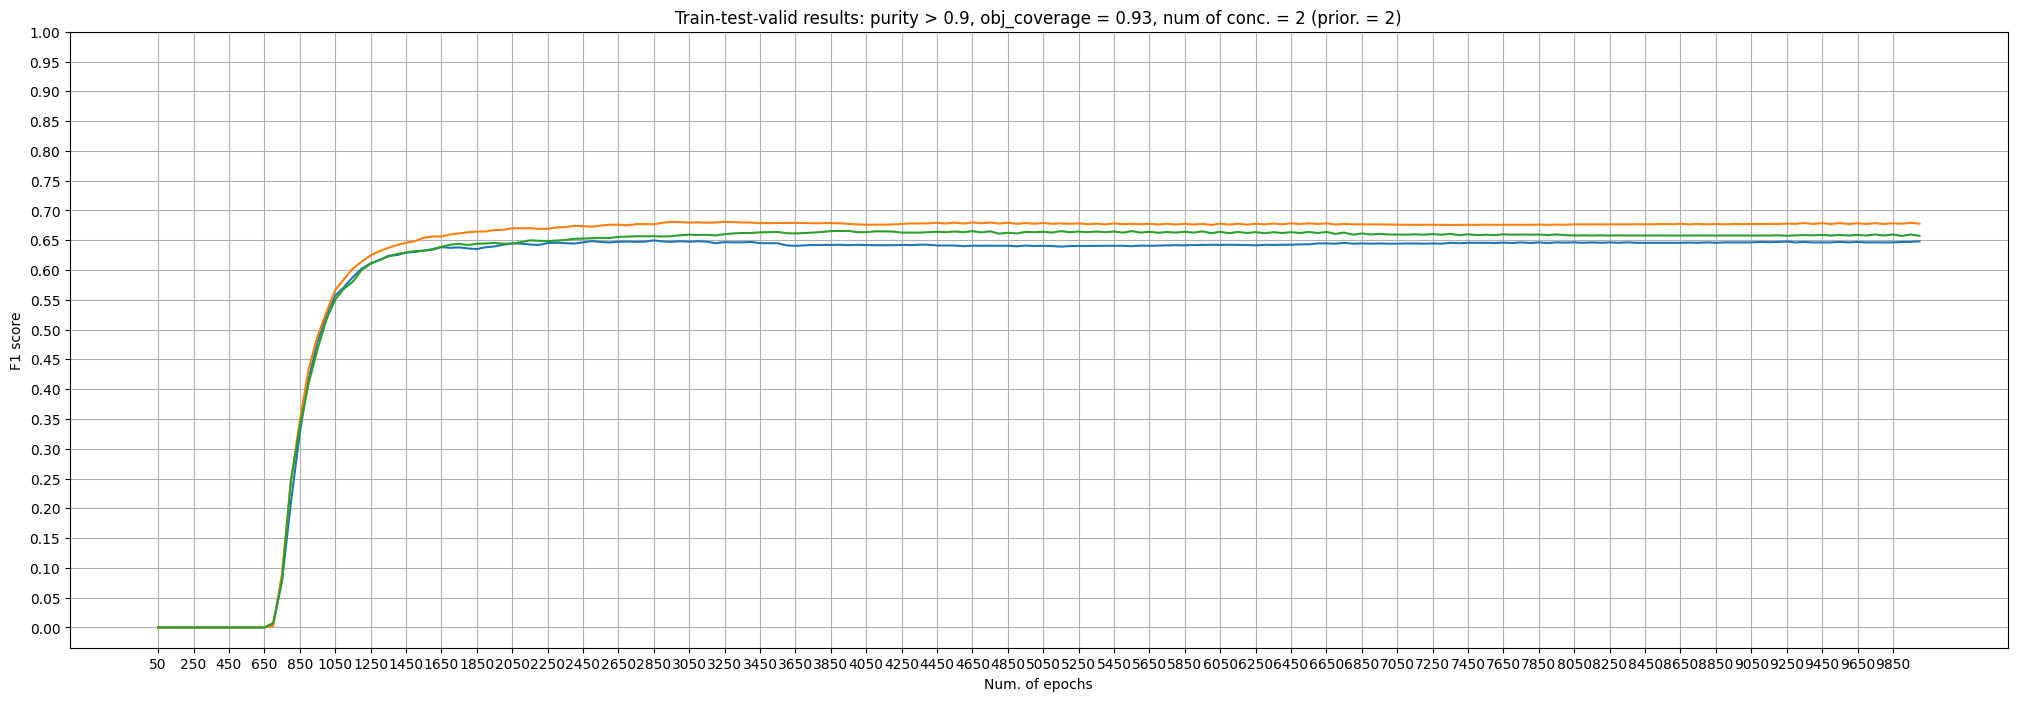

In [199]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list_,f1_list_ )
plt.plot(epochs_list_,f1_list_train_)
plt.plot(epochs_list_, f1_list_valid_)

plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 200))
plt.yticks(np.arange(0, 1.05, 0.05))

In [200]:
res_bm_060_12[res_bm_060_12['epoch'] == 2050]

,cov,epoch,F1_score_train,F1_score_val,F1_score_test
40,0.52,2050.0,0.670223,0.644444,0.644594


In [298]:

res_bm_07_1.to_csv('res_bm_070_1.csv')
res_bm_07_3.to_csv('res_bm_070_3.csv')
res_bm_07_4.to_csv('res_bm_070_4.csv')

res_bm_065_2.to_csv('res_bm_065_2.csv')
res_bm_065_3.to_csv('res_bm_065_3.csv')
res_bm_065_5.to_csv('res_bm_065_5.csv')
res_bm_065_6.to_csv('res_bm_065_6.csv')
res_bm_065_7.to_csv('res_bm_065_7.csv')

res_bm_060_1.to_csv('res_bm_060_1.csv')
res_bm_060_3.to_csv('res_bm_060_3.csv')
res_bm_060_4.to_csv('res_bm_060_4.csv')
res_bm_060_6.to_csv('res_bm_060_6.csv')
res_bm_060_7.to_csv('res_bm_060_7.csv')
res_bm_060_9.to_csv('res_bm_060_9.csv')
res_bm_060_10.to_csv('res_bm_060_10.csv')
res_bm_060_11.to_csv('res_bm_060_11.csv')
res_bm_060_12.to_csv('res_bm_060_12.csv')

res_bm_70_3_3.to_csv('res_bm_70_3_3.csv')
res_bm_70_4_3.to_csv('res_bm_70_4_3.csv')

res_bm_60_3_3.to_csv('res_bm_60_3_3.csv')
res_bm_60_4_3.to_csv('res_bm_60_4_3.csv')
res_bm_60_6_3.to_csv('res_bm_60_6_3.csv')
res_bm_60_7_3.to_csv('res_bm_60_7_3.csv')
res_bm_60_9_3.to_csv('res_bm_60_9_3.csv')
res_bm_60_10_3.to_csv('res_bm_60_10_3.csv')
res_bm_60_11_3.to_csv('res_bm_60_11_3.csv')
res_bm_60_12_3.to_csv('res_bm_60_12_3.csv')

## Testing_Checking

In [ ]:
print(L_[40].intent, L_[6].intent)

In [201]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0, 10):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
   # cn = nl.ConceptNetwork.from_lattice(L_, L_ind_3, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[12], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(51):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/10)


0
score test: 0.6481675392670158
1
score test: 0.6470278800631246
2
score test: 0.6489028213166145
3
score test: 0.6482542991141219
4
score test: 0.644723092998955
5
score test: 0.6465067778936392
6
score test: 0.6448257930317213
7
score test: 0.6443864229765013
8
score test: 0.6485355648535565
9
score test: 0.645127670661803
Test F1 score 0.6466457862177054


In [202]:
print('Test F1 score', sum(f1_list)/10)

Test F1 score 0.6466457862177054


In [151]:
f1_scores_counts = pd.DataFrame(columns = ['intent', 'object coverage','F1 test'])

In [152]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[0] = [[ L_[23].intent, L_[22].intent], full_list_ind[1][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.642


In [158]:
f1_scores_counts.loc[1] = [[L_[21].intent, L_[13].intent], full_list_ind[3][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.642
1,"[(month_apr, month_dec, month_feb, month_jan, ...",0.52,0.646


In [165]:
f1_scores_counts.loc[2] = [[L_[13].intent, L_[22].intent], full_list_ind[4][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.642
1,"[(month_apr, month_dec, month_feb, month_jan, ...",0.52,0.646
2,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.648


In [105]:
#f1_scores_counts.to_csv('res_bm_07_2.csv')

In [171]:
f1_scores_counts.loc[3] = [[L_[11].intent, L_[23].intent], full_list_ind[6][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.642
1,"[(month_apr, month_dec, month_feb, month_jan, ...",0.52,0.646
2,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.648
3,"[(poutcome_failure, poutcome_other, poutcome_s...",0.52,0.648


In [178]:
f1_scores_counts.loc[4] = [[L_[8].intent, L_[23].intent], full_list_ind[7][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.642
1,"[(month_apr, month_dec, month_feb, month_jan, ...",0.52,0.646
2,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.648
3,"[(poutcome_failure, poutcome_other, poutcome_s...",0.52,0.648
4,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.650


In [144]:
# f1_scores_counts.to_csv('res_bm_065_2.csv')

In [186]:
f1_scores_counts.loc[5] = [[L_[7].intent, L_[23].intent], full_list_ind[9][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.642
1,"[(month_apr, month_dec, month_feb, month_jan, ...",0.52,0.646
2,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.648
3,"[(poutcome_failure, poutcome_other, poutcome_s...",0.52,0.648
4,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.650
5,"[(age_18-25, age_65+, pdays_183-365, pdays_366...",0.52,0.637


In [192]:
f1_scores_counts.loc[6] = [[L_[4].intent, L_[23].intent], full_list_ind[10][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.642
1,"[(month_apr, month_dec, month_feb, month_jan, ...",0.52,0.646
2,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.648
3,"[(poutcome_failure, poutcome_other, poutcome_s...",0.52,0.648
4,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.650
5,"[(age_18-25, age_65+, pdays_183-365, pdays_366...",0.52,0.637
6,"[(pdays_183-365, pdays_366-730, pdays_731-854,...",0.52,0.648


In [197]:
f1_scores_counts.loc[7] = [[L_[2].intent, L_[23].intent], full_list_ind[11][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.642
1,"[(month_apr, month_dec, month_feb, month_jan, ...",0.52,0.646
2,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.648
3,"[(poutcome_failure, poutcome_other, poutcome_s...",0.52,0.648
4,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.650
5,"[(age_18-25, age_65+, pdays_183-365, pdays_366...",0.52,0.637
6,"[(pdays_183-365, pdays_366-730, pdays_731-854,...",0.52,0.648
7,"[(age_18-25, age_65+, pdays_366-730, pdays_731...",0.52,0.646


In [203]:
f1_scores_counts.loc[8] = [[L_[1].intent, L_[23].intent], full_list_ind[12][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.642
1,"[(month_apr, month_dec, month_feb, month_jan, ...",0.52,0.646
2,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.648
3,"[(poutcome_failure, poutcome_other, poutcome_s...",0.52,0.648
4,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.52,0.650
5,"[(age_18-25, age_65+, pdays_183-365, pdays_366...",0.52,0.637
6,"[(pdays_183-365, pdays_366-730, pdays_731-854,...",0.52,0.648
7,"[(age_18-25, age_65+, pdays_366-730, pdays_731...",0.52,0.646
8,"[(pdays_366-730, pdays_731-854, balance > 1000...",0.52,0.647


In [204]:
f1_scores_counts.to_csv('res_bm_060_2.csv')

In [243]:
f1_scores_counts.to_csv('res_bm_07_1.csv')

## End of test section

### Baseline

In [285]:
import neural_lib58 as nl
import matplotlib as plt
coverage_i = full_list_ind[12][0]
f1_list_ = []
f1_list_train_ = []
f1_list_valid_ = []
epochs_list_ = []

res_bm_60_12_3= pd.DataFrame(columns = ['cov', 'epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[12], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list_.append(k*(i+1))
    if i == 0:
        cn_.fit(X_train_, y_train_, k)
    else:
        cn_.fit_2(X_train_, y_train_, k)
    pred_all_ = cn_.predict(X_test_)
    pred_train_all_ = cn_.predict(X_train_)
    pred_val_all_ = cn_.predict(X_valid)
    pred_valid_ = pred_val_all_[1]
    pred_ = pred_all_[1]
    pred_train_ = pred_train_all_[1]
    

    print('score train:', f1_score(y_train_, pred_train_))
    print('score val:', f1_score(y_valid, pred_valid_))
    print('score test:', f1_score(y_test_, pred_))
    f1_list_.append(f1_score(y_test_, pred_))
    f1_list_train_.append(f1_score(y_train_, pred_train_))
    f1_list_valid_.append(f1_score(y_valid, pred_valid_))
    res_bm_60_12_3.loc[len(res_bm_60_12_3)] = [coverage_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_valid, pred_valid_), f1_score(y_test_, pred_)]



Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.039179675543311906
score val: 0.029657089898053754
score test: 0.03816793893129771
Epoch  650
score train: 0.18818258190982917
score val: 0.18671152228763668
score test: 0.1641659311562224
Epoch  700
score train: 0.3334170223449661
score val: 0.31675592960979343
score test: 0.3072050673000792
Epoch  750
score train: 0.418507

([<matplotlib.axis.YTick at 0x2a724a3c0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

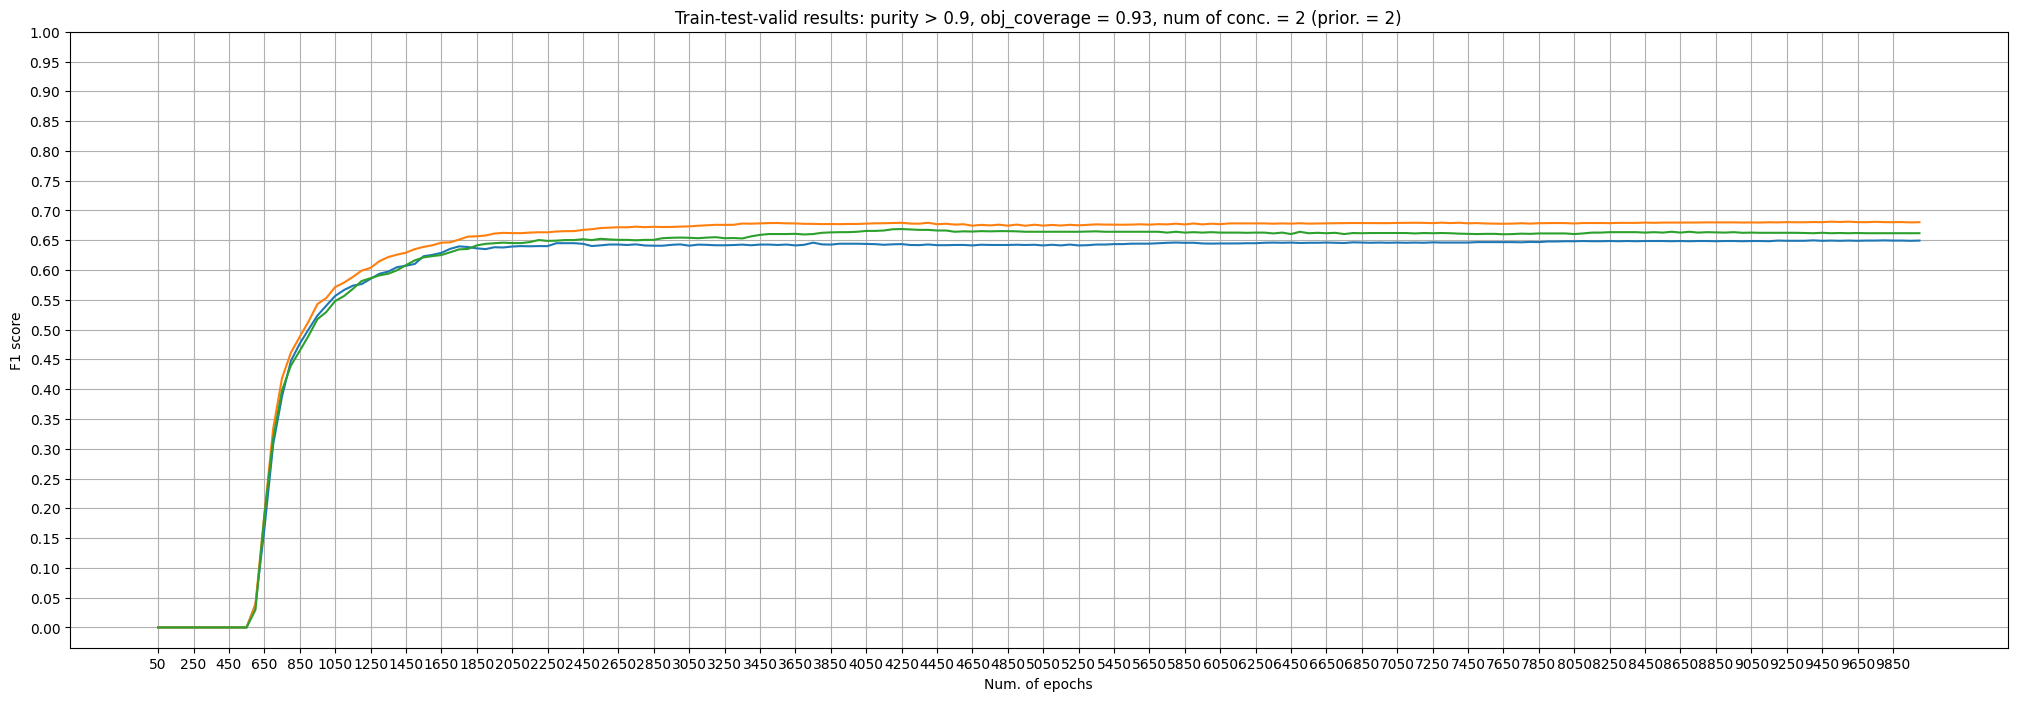

In [286]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list_,f1_list_ )
plt.plot(epochs_list_,f1_list_train_)
plt.plot(epochs_list_, f1_list_valid_)

plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 200))
plt.yticks(np.arange(0, 1.05, 0.05))

In [290]:
res_bm_60_12_3[res_bm_60_12_3['epoch'] == 1800]

,cov,epoch,F1_score_train,F1_score_val,F1_score_test
35,0.57,1800.0,0.656036,0.635331,0.638611


## Testing_parameters

In [291]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,10):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_06, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
   # cn = nl.ConceptNetwork.from_lattice(L_, L_ind_3, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[12], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(36):
        k = 50
       #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/10)


0
score test: 0.6424050632911392
1
score test: 0.6435695538057743
2
score test: 0.6377578001057641
3
score test: 0.6385224274406333
4
score test: 0.6354941551540914
5
score test: 0.6397058823529411
6
score test: 0.6396633350867964
7
score test: 0.6402116402116402
8
score test: 0.6405090137857901
9
score test: 0.6394917946003176
Test F1 score 0.6397330665834887


In [292]:
print('Test F1 score', sum(f1_list)/10)

Test F1 score 0.6397330665834887


In [234]:
f1_scores_counts = pd.DataFrame(columns = ['intent', 'object coverage','F1 test'])

In [235]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[0] = [[ L_[21].intent, L_[13].intent, L_[22].intent], full_list_ind[3][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.639


In [240]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[1] = [[L_[13].intent, L_[22].intent, L_[23].intent], full_list_ind[4][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.639
1,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.616


In [241]:
# f1_scores_counts.to_csv('res_bm_70_3.csv')

In [248]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[2] = [[L_[11].intent, L_[23].intent, L_[22].intent], full_list_ind[6][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.639
1,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.616
2,"[(poutcome_failure, poutcome_other, poutcome_s...",0.57,0.641


In [249]:
# f1_scores_counts.to_csv('House_Votes_85_4.csv')

In [250]:
# f2_scores_counts.read('House_Votes_85_4.csv')
# f2_scores_counts

In [258]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[3] = [[L_[8].intent, L_[23].intent, L_[22].intent], full_list_ind[7][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.639
1,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.616
2,"[(poutcome_failure, poutcome_other, poutcome_s...",0.57,0.641
3,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.639


In [264]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[4] = [[ L_[7].intent, L_[23].intent, L_[22].intent], full_list_ind[9][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.639
1,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.616
2,"[(poutcome_failure, poutcome_other, poutcome_s...",0.57,0.641
3,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.639
4,"[(age_18-25, age_65+, pdays_183-365, pdays_366...",0.57,0.640


In [275]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[5] = [[L_[4].intent, L_[23].intent,  L_[22].intent], full_list_ind[10][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.639
1,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.616
2,"[(poutcome_failure, poutcome_other, poutcome_s...",0.57,0.641
3,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.639
4,"[(age_18-25, age_65+, pdays_183-365, pdays_366...",0.57,0.640
5,"[(pdays_183-365, pdays_366-730, pdays_731-854,...",0.57,0.642


In [284]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[6] = [[L_[2].intent, L_[23].intent,  L_[22].intent], full_list_ind[11][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.639
1,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.616
2,"[(poutcome_failure, poutcome_other, poutcome_s...",0.57,0.641
3,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.639
4,"[(age_18-25, age_65+, pdays_183-365, pdays_366...",0.57,0.640
5,"[(pdays_183-365, pdays_366-730, pdays_731-854,...",0.57,0.642
6,"[(age_18-25, age_65+, pdays_366-730, pdays_731...",0.57,0.639


In [293]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[7] = [[L_[1].intent, L_[23].intent,  L_[22].intent], full_list_ind[12][0],round(sum(f1_list)/10,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(month_apr, month_dec, month_feb, month_jan, ...",0.57,0.639
1,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.616
2,"[(poutcome_failure, poutcome_other, poutcome_s...",0.57,0.641
3,"[(month_mar, month_oct, month_sep, poutcome_ot...",0.57,0.639
4,"[(age_18-25, age_65+, pdays_183-365, pdays_366...",0.57,0.640
5,"[(pdays_183-365, pdays_366-730, pdays_731-854,...",0.57,0.642
6,"[(age_18-25, age_65+, pdays_366-730, pdays_731...",0.57,0.639
7,"[(pdays_366-730, pdays_731-854, balance > 1000...",0.57,0.640


In [294]:
f1_scores_counts.to_csv('res_bm_60_3.csv')

#### Choosing 3 concepts with maximal union coverage with purity above 0.7

In [206]:
n = 3
pur_ = 0.7
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen1 = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un1 = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un1)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen1 = conc
    max_cov2 = max_cov
            
            
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen1)

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov2) <=len(max_cov.union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un2 = round(len((max_cov).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un2)
            max_cov2 = max_cov.union(set(conc[0].extent))
            chosen2 = conc
    conc_prior.append(chosen2)
        
        
    list_param.append(conc_prior)
    list_param.append(cover_un2)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un2)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.3
0.3
0.24
0.24
0.15
0.24
0.24
{1: [0.3, [8, 9, 9]], 2: [0.3, [8, 9, 9]], 3: [0.3, [2, 9, 8]], 4: [0.3, [1, 9, 8]]}


#### Choosing 3 concepts with maximal union coverage with purity above 0.65

In [225]:
n = 3
pur_ = 0.65
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen1 = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un1 = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un1)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen1 = conc
    max_cov2 = max_cov
            
            
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen1)

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov2) <=len(max_cov.union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un2 = round(len((max_cov).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un2)
            max_cov2 = max_cov.union(set(conc[0].extent))
            chosen2 = conc
    conc_prior.append(chosen2)
        
        
    list_param.append(conc_prior)
    list_param.append(cover_un2)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un2)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.32
0.35
0.45
0.29
0.3
0.35
0.45
0.29
0.3
0.35
0.45
0.29
0.32
0.45
0.23
0.24
0.24
0.32
0.45
0.15
0.23
0.24
0.24
0.27
0.45
{1: [0.45, [21, 21, 21]], 2: [0.45, [11, 21, 21]], 3: [0.45, [8, 21, 21]], 4: [0.45, [8, 21, 21]], 5: [0.45, [7, 21, 21]], 6: [0.45, [2, 21, 21]], 7: [0.45, [1, 21, 21]]}


#### Choosing 3 concepts with maximal union coverage with purity above 0.6

In [228]:
n = 3
pur_ = 0.6
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen1 = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un1 = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un1)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen1 = conc
    max_cov2 = max_cov
            
            
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen1)

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov2) <=len(max_cov.union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un2 = round(len((max_cov).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un2)
            max_cov2 = max_cov.union(set(conc[0].extent))
            chosen2 = conc
    conc_prior.append(chosen2)
        
        
    list_param.append(conc_prior)
    list_param.append(cover_un2)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un2)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.57
0.52
0.57
0.52
0.36
0.37
0.42
0.52
0.52
0.36
0.37
0.42
0.52
0.52
0.32
0.35
0.42
0.45
0.46
0.52
0.29
0.3
0.35
0.37
0.45
0.46
0.52
0.29
0.3
0.35
0.37
0.45
0.46
0.52
0.29
0.32
0.36
0.39
0.45
0.46
0.52
0.23
0.29
0.32
0.36
0.39
0.45
0.46
0.52
0.23
0.24
0.24
0.32
0.45
0.46
0.52
0.15
0.16
0.23
0.24
0.24
0.27
0.31
0.31
0.45
0.46
0.52
{1: [0.57, [23, 22, 23]], 2: [0.57, [22, 23, 23]], 3: [0.57, [21, 13, 22]], 4: [0.57, [13, 22, 23]], 5: [0.57, [13, 22, 23]], 6: [0.57, [11, 23, 22]], 7: [0.57, [8, 23, 22]], 8: [0.57, [8, 23, 22]], 9: [0.57, [7, 23, 22]], 10: [0.57, [4, 23, 22]], 11: [0.57, [2, 23, 22]], 12: [0.57, [1, 23, 22]]}
